# importing dependencies

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Importing data and performing initial analysis

In [17]:
#importing dataset to a pandas dataframe
data=pd.read_csv(r'C:\Users\KIIT\OneDrive\Desktop\my-documents\programming\CreditCardFraudDetection\creditcard_2023.csv')

In [18]:
# first 5 rows of the dataset
data.head()

id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  Class  
0 -0.434824 -0.081230 -0.151045  17982.10      0  
1  0.296503 -0.248052 -0.064512   6531.37      0  
2 -0.312895 -0.300258 -0.244718   2513.54      0  
3 -0.515950 -0.165316  0.048424   5384.44      0  
4  1.071126  0.023712  0.419117  14278.97      0  

[5 rows x 31 columns]

In [19]:
data.tail()

id        V1        V2        V3        V4        V5        V6  \
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22       V23  \
568625 -0.370393  0.189694 -0.938153  ...  0.167503  0.419731  1.288249   
568626 -0.016935 -0.147733  0.483894  ...  0.031874  0.388161 -0.154257   
568627 -0.070958 -0.019997 -0.122048  ...  0.140788  0.536523 -0.211100   
568628  0.580568 -0.207723  0.893527  ... -0.060381 -0.195609 -0.175488   
568629 -0.347613 -0.340814  0.253971  ...  0.534853 -0.291514  0.157303   

             V24       V25       V26       V27       V28    Amount  Class  
568625 -0.900861  0.560661 -0.006018  3.308968  0.081564   4394.16      1  
568626 -0.846452 -0.153443  1.961398 -1.528642  1.704306   4653.40      1  
568627 -0.448909  0.540073 -0.755836 -0.487540 -0.268741  23572.85      1  
568628 -0.554643 -0.099669 -1.434931 -0.159269 -0.076251  10160.83      1  
568629  0.931030 -0.349423 -1.090974 -1.575113  0.722936  21493.92      1  

[5 rows x 31 columns]

In [20]:
#dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [21]:
#checking for null values.
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [22]:
# distribution of legit transaction & fradulent transactions
data['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

# data visualization and Exploration

In [23]:
#check creddit card fraud class                   
px.histogram(data_frame=data,x='Class', color='Class')

<function matplotlib.pyplot.show(close=None, block=None)>

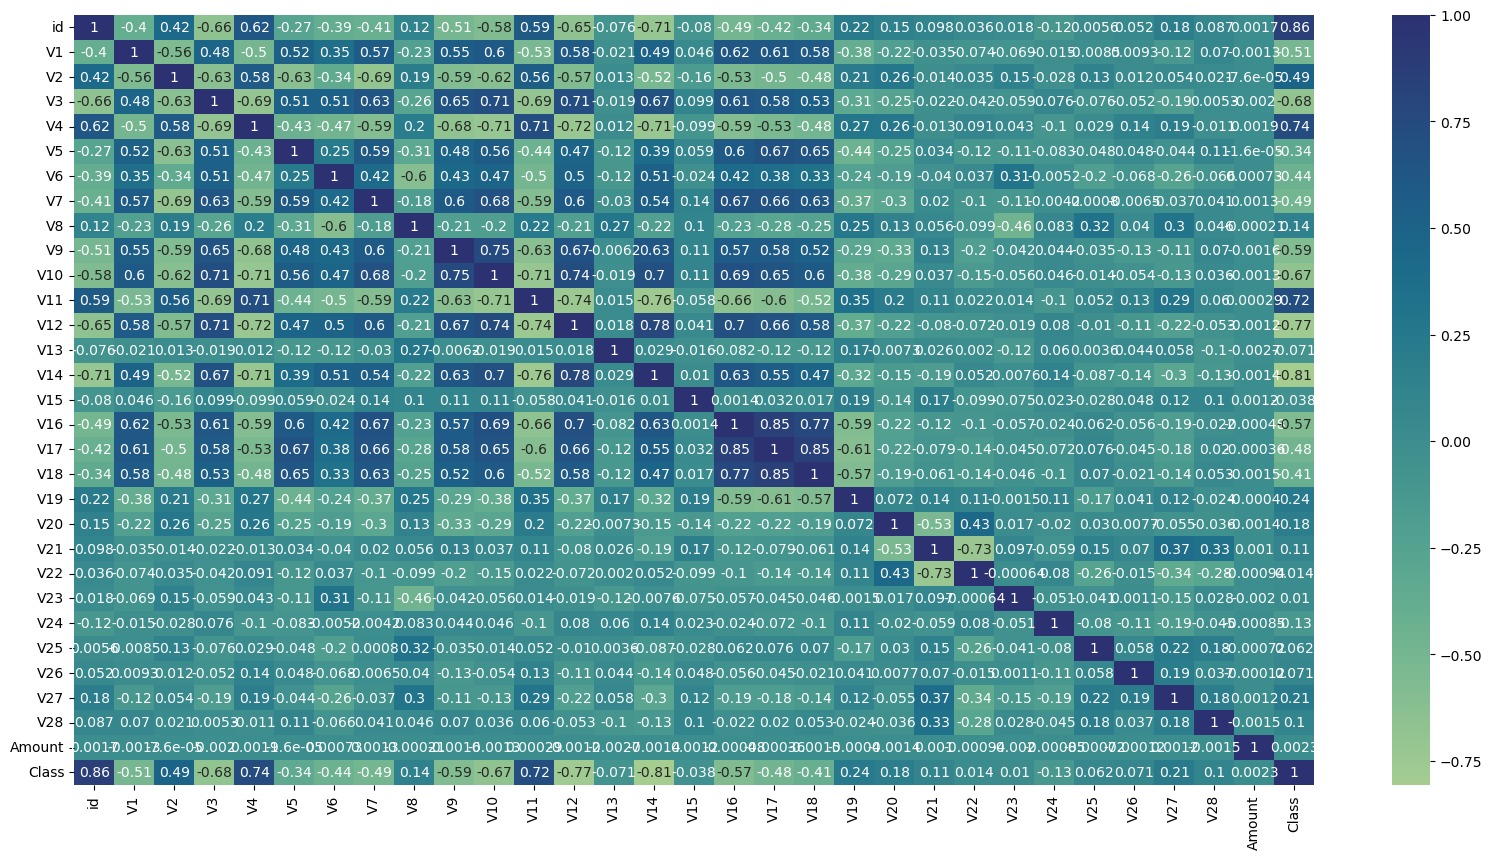

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), cmap = 'crest', annot = True)
plt.show

In [25]:
data.skew()

id       -6.579536e-16
V1       -8.341717e-02
V2       -1.397952e+00
V3        1.462221e-02
V4       -4.416893e-02
V5        1.506414e+00
V6       -2.016110e-01
V7        1.902687e+01
V8        2.999722e-01
V9        1.710575e-01
V10       7.404136e-01
V11      -2.089056e-02
V12       6.675895e-02
V13       1.490639e-02
V14       2.078348e-01
V15       1.123298e-02
V16       2.664070e-01
V17       3.730610e-01
V18       1.291911e-01
V19      -1.017123e-02
V20      -1.556460e+00
V21      -1.089833e-01
V22       3.185295e-01
V23      -9.968746e-02
V24       6.608974e-02
V25       2.300804e-02
V26      -1.895874e-02
V27       2.755452e+00
V28       1.724978e+00
Amount    1.655585e-03
Class     0.000000e+00
dtype: float64

**Positively Skewed Data:**

Features like V7, V5, V20, V27, and V28 exhibit positive skewness. This is indicated by their positive mean values, with V7 being particularly notable with a mean of approximately 19.03. Positive skewness suggests that the majority of data points in these features are concentrated on the lower end, with a long tail extending towards higher values.

**Negatively Skewed Data:**

None of the features in the provided data exhibit significant negative skewness. Negative skewness would be indicated by negative mean values, but all features have means closer to zero or slightly positive.

# Model implementation
we will define our dependent and independent features by y and x

In [26]:
y= data.Class
x= data.drop(['id','Class'],axis=1)

In [27]:
x.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0 -0.130006  0.727159  0.637735  ...  0.091202 -0.110552  0.217606 -0.134794   
1 -0.133118  0.347452  0.529808  ... -0.233984 -0.194936 -0.605761  0.079469   
2 -0.095576 -0.261297  0.690708  ...  0.361652 -0.005020  0.702906  0.945045   
3 -0.065130 -0.205698  0.575231  ... -0.378223 -0.146927 -0.038212 -0.214048   
4 -0.212660  1.049921  0.968046  ...  0.247237 -0.106984  0.729727 -0.161666   

        V24       V25       V26       V27       V28    Amount  
0  0.165959  0.126280 -0.434824 -0.081230 -0.151045  17982.10  
1 -0.577395  0.190090  0.296503 -0.248052 -0.064512   6531.37  
2 -1.154666 -0.605564 -0.312895 -0.300258 -0.244718   2513.54  
3 -1.893131  1.003963 -0.515950 -0.165316  0.048424   5384.44  
4  0.312561 -0.414116  1.071126  0.023712  0.419117  14278.97  

[5 rows x 29 columns]

In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)

In [30]:
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled_df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0 -0.130006  0.727159  0.637735  ...  0.091202 -0.110552  0.217606 -0.134794   
1 -0.133118  0.347452  0.529808  ... -0.233984 -0.194936 -0.605761  0.079469   
2 -0.095576 -0.261297  0.690708  ...  0.361652 -0.005020  0.702906  0.945045   
3 -0.065130 -0.205698  0.575231  ... -0.378223 -0.146927 -0.038212 -0.214048   
4 -0.212660  1.049921  0.968046  ...  0.247237 -0.106984  0.729727 -0.161666   

        V24       V25       V26       V27       V28    Amount  
0  0.165959  0.126280 -0.434824 -0.081230 -0.151045  0.858447  
1 -0.577395  0.190090  0.296503 -0.248052 -0.064512 -0.796369  
2 -1.154666 -0.605564 -0.312895 -0.300258 -0.244718 -1.377011  
3 -1.893131  1.003963 -0.515950 -0.165316  0.048424 -0.962119  
4  0.312561 -0.414116  1.071126  0.023712  0.419117  0.323285  

[5 rows x 29 columns]

In [31]:
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size = 0.2, random_state = 5, stratify = y)

In [34]:
print(x_train.shape,x_test.shape)

(454904, 29) (113726, 29)


# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [39]:
LR.fit(x_train, y_train)

LogisticRegression()

In [40]:
lr_predictions_train = LR.predict(x_train)
lr_predictions_test = LR.predict(x_test)

Accuracy Score is: 0.9647705889594288
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    227452
           1       0.98      0.95      0.96    227452

    accuracy                           0.96    454904
   macro avg       0.97      0.96      0.96    454904
weighted avg       0.97      0.96      0.96    454904



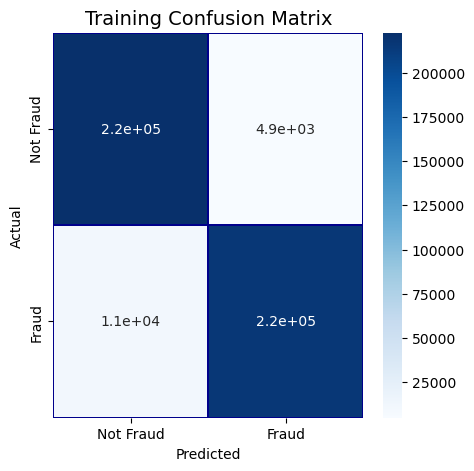

In [41]:
asc = accuracy_score(y_train, lr_predictions_train)
cr = classification_report(y_train, lr_predictions_train)
print("Accuracy Score is:", asc)
print(cr)
cm = pd.crosstab(y_train, lr_predictions_train, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Training Confusion Matrix', fontsize=14)
plt.show()

Accuracy Score is: 0.9656630849585847
[[55708  1155]
 [ 2750 54113]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



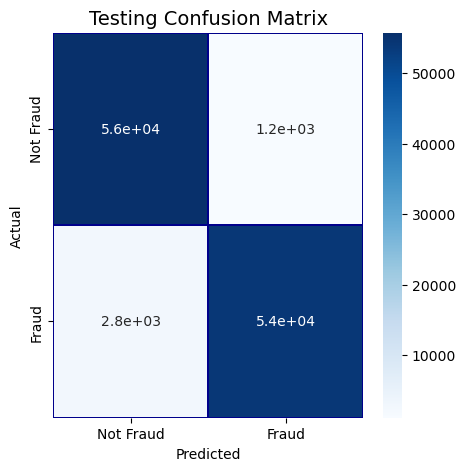

In [42]:
asc = accuracy_score(y_test, lr_predictions_test)
cm = confusion_matrix(y_test, lr_predictions_test)
cr = classification_report(y_test, lr_predictions_test)
print("Accuracy Score is:", asc)
print(cm)
print(cr)

cm = pd.crosstab(y_test, lr_predictions_test, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Testing Confusion Matrix', fontsize=14)
plt.show()

In [43]:
#logistic regression model yeilds 97% accuracy

# Random Forest

In [44]:
RFC = RandomForestClassifier(n_jobs = 4,
                             random_state = 5,
                             n_estimators = 100,
                             max_depth = 5,
                             verbose = False)

In [47]:
RFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=4, random_state=5, verbose=False)

In [49]:
rf_predictions_train = RFC.predict(x_train)
rf_predictions_test = RFC.predict(x_test)

Accuracy Score is: 0.9544277473928565
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    227452
           1       0.98      0.95      0.96    227452

    accuracy                           0.96    454904
   macro avg       0.97      0.96      0.96    454904
weighted avg       0.97      0.96      0.96    454904



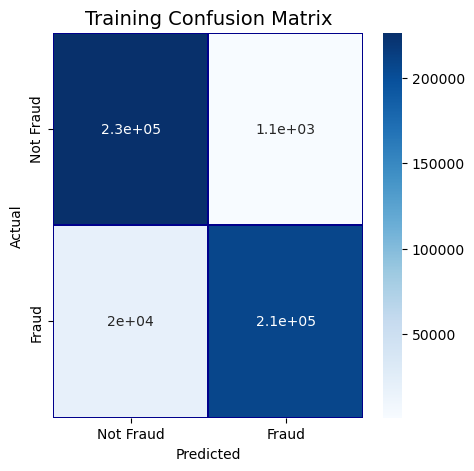

In [50]:
asc = accuracy_score(y_train, rf_predictions_train)
cr = classification_report(y_train, lr_predictions_train)
print("Accuracy Score is:", asc)
print(cr)

# Plot training confusion matrix 
cm = pd.crosstab(y_train, rf_predictions_train, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Training Confusion Matrix', fontsize=14)
plt.show()

Accuracy Score is: 0.9551026150572428
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56863
           1       1.00      0.91      0.95     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



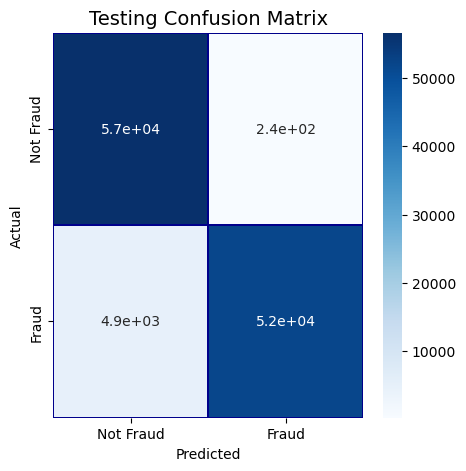

In [51]:
asc = accuracy_score(y_test, rf_predictions_test)
cr = classification_report(y_test, rf_predictions_test)
print("Accuracy Score is:", asc)
print(cr)

# Plot testing confusion matrix 
cm = pd.crosstab(y_test, rf_predictions_test, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Testing Confusion Matrix', fontsize=14)
plt.show()